# 목표1) 다양한 방법으로 공지사항을 10개 영역으로 분류


1.   [지도 분류] Scikit-Learn의 Classification
2.   [비지도 분류] K-평균(K-Means)
3.   [비지도 분류] 계층적 클러스터링



\
# 목표2) 선형회귀를 실행하여 세 키워드와 분류의 관계를 시각화하기

*   X1 : 첫번째 키워드 가중치
*   X2 : 두번째 키워드 가중치
*   X3 : 세번째 키워드 가중치
*   Y : 분류 키워드 가중치 (목표1에서 불러오기)

 -> Y = aX1 + bX2 + cX3

\
# 목표3) 분류가 잘 이루어졌는지 예측확률 계산하기

# **[데이터 준비]**

*   title_list: 공지사항 제목 리스트
*   top3_list: 각 공지사항에서 중요도 상위 3개의 값
*   df_keyword3: top3_list를 데이터프레임화 한 것





In [10]:
#1.데이터 불러오기(데이터형확인)(dim,shape)
from google.colab import drive
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/db.sheet.csv'
dataset = pd.read_csv(file_path,header=None)

# 데이터 확인
print(dataset)
print(dataset.dtypes)# 각 열의 데이터 타입 확인
print(dataset.shape)# 데이터의 행과 열의 개수 확인

#titleSet keywordSet나누기
X = dataset.iloc[:, 1] #titleSet
y1 = dataset.iloc[:, 2] #keywordSet1
y2 = dataset.iloc[:, 3] #keywordSet2
y3 = dataset.iloc[:, 4] #keywordSet3

print("X_dataset")
print(X)
print("X_shape")
print(X.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      0                                                  1       2     3  \
0    경력                           [채용] 본교 인재개발원 연구원 채용 공고     인재개발   연구원   
1    경력  [인재개발원/채용상담회] 한국경제인협회(구 전국경제인연합회) 채용상담회: 11.1....    경제협회    채용   
2    경력                               [채용] 산학협력단 직원 채용 공고    산학협력단    직원   
3    학사  [글로벌소통교육실] 겨울계절학기 영어 말하기프로그램 Speaking Master P...  겨울계절학기    영어   
4    일반  [언어교육원] 2023학년도 싱가포르 NTU 난양공대 위탁과정 언어교육원 한국어도우...    싱가포르  언어교육   
..   ..                                                ...     ...   ...   
215  일반             [채용]이화여자대학교 산학협력단 직원(사업관리 및 정산) 채용 공고    산학협력단    직원   
216  일반                      [조교모집] 23-2 건축학전공 A/B급 조교 모집      건축학     A   
217  일반             [정책과학대학원] 2023학년도 2학기 B급 학생조교 모집 (마감)     정책과학    B급   
218  일반                      [조교모집] 2023-2학기 수학과 B급 조교 모집      수학과    B급   
219  일반                [교육혁신센터] 맞춤형

In [11]:
# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [12]:
#필요한 라이브러리 불러오기(분해 이전)

import numpy as np

!pip install kiwipiepy
from kiwipiepy import Kiwi

!pip install keybert
from keybert import KeyBERT

!pip install transformers
from transformers import BertModel


model = BertModel.from_pretrained('skt/kobert-base-v1')
kw_model = KeyBERT(model)

In [13]:
import re

# Kiwi 형태소 분석기 초기화
kiwi = Kiwi()

# 정규표현식을 사용하여 알파벳이 포함된 단어를 걸러내는 패턴
alphabet_pattern = re.compile('[a-zA-Z]')

# 각 행의 키워드를 저장할 리스트
X_kiwi = []

# 각 행을 처리하여 키워드 추출 후 저장
for title in X:
    # Kiwi 형태소 분석 수행
    kiwi_result = kiwi.analyze(title)

    # 명사 추출 함수
    def noun_extractor_kiwi(kiwi_result):
        nouns = []
        for token, pos, _, _ in kiwi_result[0][0]:
            if len(token) != 1 and (pos.startswith('N') or pos.startswith('SL')) and not alphabet_pattern.search(token):
                nouns.append(token)
        return nouns

    # 명사 추출
    nouns = noun_extractor_kiwi(kiwi_result)

    # 추출된 명사를 X_kiwi에 추가
    X_kiwi.append(nouns)

for i in range(len(X_kiwi)):
  print(X_kiwi[i])


['채용', '본교', '인재', '개발원', '연구원', '채용', '공고']
['인재', '개발원', '채용', '상담회', '한국', '경제인', '협회', '전국경제인연합회', '채용', '상담회']
['채용', '산학', '협력단', '직원', '채용', '공고']
['글로벌', '소통', '교육실', '겨울', '계절', '학기', '영어', '말하기', '프로그램', '등록', '안내']
['언어', '교육원', '학년도', '싱가포르', '공대', '위탁', '과정', '언어', '교육원', '한국어', '도우미', '모집']
['교육', '혁신', '센터', '융합', '수업', '운영', '사례', '공유', '융합', '수업', '운영', '사례', '발표', '전시', '안내']
['인재', '개발원', '학년도', '겨울', '방학', '현장', '실습', '모집', '안내']
['학년도', '전기', '졸업', '예정', '여부', '조회', '졸업', '의사', '신청', '관련', '안내']
['국제', '학생증', '발급', '지원', '행사', '안내']
['학년도', '전공', '변경', '시행', '안내']
['학년도', '시행', '안내']
['국제', '교류', '싱가포르', '교환', '프로그램', '설명회']
['대학', '건강', '센터', '학생', '건강', '검사', '시행', '안내']
['연구윤리', '센터', '연구윤리', '특강', '신청', '안내']
['학부', '학년도', '학기', '이화', '플러스', '장학금', '신청', '안내']
['다문화', '연구소', '상호', '문화', '학술', '대회', '외국', '한국', '상호', '문화', '교육', '관점']
['학부', '방일영', '문화', '재단', '장학', '선발', '안내', '북한이탈주민', '대학', '지원']
['글로벌', '소통', '교육실', '겨울', '계절', '학기', '영어', '말하기', '프로그램', '등록

In [14]:
#KIWI=KIWI_COMBINED(목적; 코버트 사용을 위해 리스트에서 문자열로 JOIN
# x 리스트에 있는 문자열들을 join하여 하나의 문자열로 합치기

X_kiwi_combined = [' '.join(sentence) for sentence in X_kiwi]
print(len(X_kiwi_combined))

#k_kiwi값 엑셀에 자동저장(num=217,header가 추가됨)
!pip install xlsxwriter
df_kiwi = pd.DataFrame(X_kiwi)
file_path = '/content/drive/MyDrive/kiwi_auto.xlsx'
with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    df_kiwi.to_excel(writer, sheet_name='kiwi_auto', index=False)

print(len(X_kiwi_combined))


220
220


In [15]:
#bert_keyword초기화
bert_keyword=[]

# X_kiwi_combined의 길이만큼 반복: 모든 단어의 중요도 출력
for i in range(len(X_kiwi_combined)):
    # 키워드 추출
    keywords = kw_model.extract_keywords(X_kiwi_combined[i], keyphrase_ngram_range=(1, 1), stop_words=None, top_n=20)

    # bert_keyword 에 키워드 추가
    bert_keyword.append(keywords)

for i, value in enumerate(bert_keyword):
    print(f"weight at index {i}: {value}")


weight at index 0: [('공고', 0.7976), ('본교', 0.7846), ('인재', 0.6537), ('개발원', 0.5053), ('연구원', 0.4673), ('채용', 0.3804)]
weight at index 1: [('협회', 0.7234), ('경제인', 0.6864), ('인재', 0.6608), ('한국', 0.5754), ('상담회', 0.5725), ('개발원', 0.5551), ('전국경제인연합회', 0.5034), ('채용', 0.4051)]
weight at index 2: [('공고', 0.7352), ('직원', 0.6272), ('협력단', 0.56), ('산학', 0.5209), ('채용', 0.4312)]
weight at index 3: [('영어', 0.5199), ('소통', 0.4851), ('겨울', 0.4582), ('학기', 0.4185), ('계절', 0.4116), ('교육실', 0.3942), ('글로벌', 0.3856), ('말하기', 0.3602), ('등록', 0.3184), ('안내', 0.3143), ('프로그램', 0.2849)]
weight at index 4: [('싱가포르', 0.6966), ('한국어', 0.6114), ('언어', 0.5476), ('교육원', 0.4693), ('도우미', 0.4606), ('학년도', 0.4231), ('위탁', 0.3424), ('모집', 0.3195), ('공대', 0.2697), ('과정', 0.2474)]
weight at index 5: [('수업', 0.5876), ('융합', 0.5099), ('교육', 0.499), ('혁신', 0.4807), ('전시', 0.4378), ('사례', 0.4124), ('센터', 0.4057), ('발표', 0.3818), ('공유', 0.3728), ('운영', 0.3349), ('안내', 0.3289)]
weight at index 6: [('학년도', 0.8406), ('안내', 

weight_list: 각 공지사항의 키워드에 대한 중요도 리스트\
top3_list: 각 공지사항에서 중요도 상위 3개의 값

In [16]:
weight_list = []
for keywords in bert_keyword:
  weight_list.append([item[1] for item in keywords])
print("weight_list = ",weight_list)

top3_list = []
for weight in weight_list:
  top3_list.append(weight[0:3])
print("top3_list = ",top3_list)

weight_list =  [[0.7976, 0.7846, 0.6537, 0.5053, 0.4673, 0.3804], [0.7234, 0.6864, 0.6608, 0.5754, 0.5725, 0.5551, 0.5034, 0.4051], [0.7352, 0.6272, 0.56, 0.5209, 0.4312], [0.5199, 0.4851, 0.4582, 0.4185, 0.4116, 0.3942, 0.3856, 0.3602, 0.3184, 0.3143, 0.2849], [0.6966, 0.6114, 0.5476, 0.4693, 0.4606, 0.4231, 0.3424, 0.3195, 0.2697, 0.2474], [0.5876, 0.5099, 0.499, 0.4807, 0.4378, 0.4124, 0.4057, 0.3818, 0.3728, 0.3349, 0.3289], [0.8406, 0.7878, 0.5423, 0.4739, 0.416, 0.3887, 0.3792, 0.3582, 0.2437], [0.8442, 0.8018, 0.7767, 0.6093, 0.5518, 0.414, 0.3823, 0.3734, 0.3243, 0.2307], [0.8671, 0.8063, 0.7084, 0.6608, 0.6002, 0.5804], [0.9189, 0.8675, 0.6703, 0.6048, 0.5554], [0.9569, 0.9341, 0.6362], [0.6962, 0.5376, 0.3666, 0.2981, 0.2706, 0.2137], [0.7502, 0.7135, 0.6903, 0.6644, 0.5308, 0.5211, 0.4383], [0.8173, 0.5129, 0.4686, 0.3817, 0.2929], [0.8401, 0.803, 0.7607, 0.7276, 0.662, 0.5899, 0.5542, 0.3846], [0.6997, 0.6836, 0.6353, 0.6018, 0.5634, 0.5581, 0.5254, 0.5221, 0.4789, 0.4095],

In [17]:
df_keyword3 = pd.DataFrame(top3_list, columns=['X1(keyword1)', 'X2(keyword2)', 'X3(keyword3)'])
df_keyword3.index = [f"{i+1}번째 공지사항" for i in range(220)]
df_keyword3

,X1(keyword1),X2(keyword2),X3(keyword3)
1번째 공지사항,0.7976,0.7846,0.6537
2번째 공지사항,0.7234,0.6864,0.6608
3번째 공지사항,0.7352,0.6272,0.5600
4번째 공지사항,0.5199,0.4851,0.4582
5번째 공지사항,0.6966,0.6114,0.5476
...,...,...,...
216번째 공지사항,0.7370,0.7176,0.6357
217번째 공지사항,0.7515,0.6480,0.6328
218번째 공지사항,0.7438,0.7084,0.6847
219번째 공지사항,0.8285,0.7389,0.7291


# **[비지도 분류] K-평균(K-Means)**
*   1~10으로 분류(영역 지정X)
*   cluster_labels1

In [18]:
from sklearn.cluster import KMeans
import numpy as np

data = np.array(top3_list)

# K-평균 알고리즘 적용
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(data)

# 클러스터 할당
cluster_labels1 = kmeans.labels_+1

# 결과 출력
print(" K-Means level\n",cluster_labels1)

 K-Means level
 [ 4  1  3  8  9  2 10  7  7  7  7  5  1  6  7  3  3  8  2  5 10  9  8  2
  3  7  1  4  7  2  6  2  4  5  8  1  9  8  7  2  2  2  9  9  1  7  2  1
  1  4  8  4  1  1  6  8  9  3  5  7  1  4  3  7  1  4  3  1  4  5  1  2
  3  3  5  5  9  8  6  6  1  6  2  9  8 10 10  3  1  1  4  4  3  4  7  1
  8  8  7  1  9  2  3  2  3  3  2  8  8  8  5  3  9  3  9  3  7  7  8  1
  4 10  9  6  5  2  1 10  5  3  1  2  4  8  4  9 10  8  6  4  4  6  1  4
  3  1  4  2  4  1  9  8  4  8  2  1  1  9  4  9  6  1  9  9  6  9  3  9
  8  1  3  4  1  2  1  1  6  3  5  7  8  3  2  8  2  9  8  3  9  3  4  3
  1  3  4  6  7  3  4  4  8  1  3  1  8  7  3  3  2  9  9  4  4  3  6  1
  3  1  4  8]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


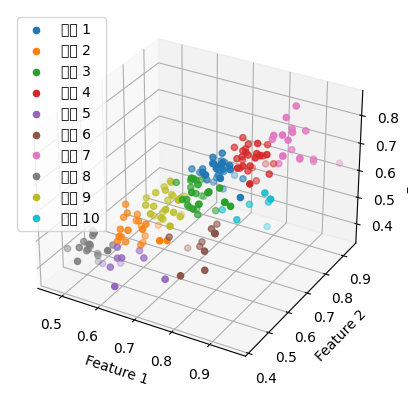

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import font_manager, rc


font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 나눔 폰트의 실제 경로로 변경
font_prop = font_manager.FontProperties(fname=font_path)
font_name = font_prop.get_name()
rc('font', family=font_name)

data = np.array(top3_list)

# K-Means 알고리즘 적용
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(data)

# 클러스터 할당
cluster_labels = kmeans.labels_

# 3D 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 각 클러스터를 색으로 구분하여 데이터 포인트 추가
for i in range(10):
    cluster_data = data[cluster_labels == i]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2],label=f'영역 {i+1}')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

ax.legend(loc='best')
plt.show()

In [11]:
df_kmeans = pd.concat([X,df_keyword3], axis=1, ignore_index=False)
df_kmeans['Y(K-Means분류)'] = cluster_labels1
df_kmeans

,1,X1(keyword1),X2(keyword2),X3(keyword3),Y(K-Means분류)
0,[채용] 본교 인재개발원 연구원 채용 공고,0.7976,0.7846,0.6537,4
1,[인재개발원/채용상담회] 한국경제인협회(구 전국경제인연합회) 채용상담회: 11.1....,0.7234,0.6864,0.6608,1
2,[채용] 산학협력단 직원 채용 공고,0.7352,0.6272,0.5600,3
3,[글로벌소통교육실] 겨울계절학기 영어 말하기프로그램 Speaking Master P...,0.5199,0.4851,0.4582,8
4,[언어교육원] 2023학년도 싱가포르 NTU 난양공대 위탁과정 언어교육원 한국어도우...,0.6966,0.6114,0.5476,9
...,...,...,...,...,...
215,[채용]이화여자대학교 산학협력단 직원(사업관리 및 정산) 채용 공고,0.7370,0.7176,0.6357,1
216,[조교모집] 23-2 건축학전공 A/B급 조교 모집,0.7515,0.6480,0.6328,3
217,[정책과학대학원] 2023학년도 2학기 B급 학생조교 모집 (마감),0.7438,0.7084,0.6847,1
218,[조교모집] 2023-2학기 수학과 B급 조교 모집,0.8285,0.7389,0.7291,4


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

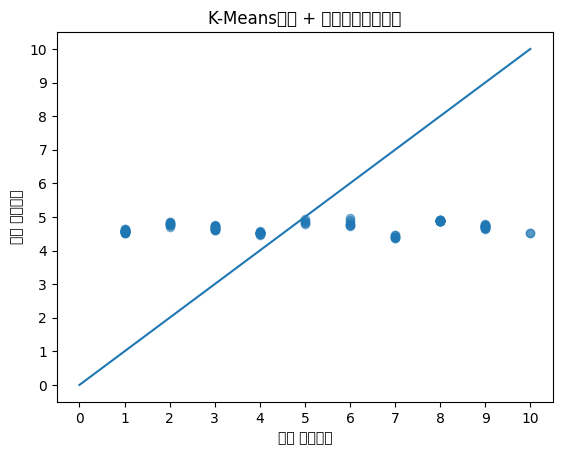

In [21]:
from sklearn.model_selection import train_test_split
# 데이터 분할
data_X = df_kmeans[['X1(keyword1)','X2(keyword2)','X2(keyword2)']]
val_Y = df_kmeans[['Y(K-Means분류)']]
data_X_train, data_X_test, val_Y_train, val_Y_test = train_test_split(data_X, val_Y, train_size = 0.5, test_size = 0.5)

from sklearn.linear_model import LinearRegression
# 다중 선형회귀 모델 학습
mlr = LinearRegression()
mlr.fit(data_X_train, val_Y_train)
val_Y_predict = mlr.predict(data_X_test)

import matplotlib.pyplot as plt
# 그래프 플로팅
x = np.linspace(0, 10, 10)
y =  x
plt.scatter(val_Y_test, val_Y_predict, alpha = 0.5)
# 비교 직선 y=x 플로팅
plt.plot(x, y, label='y=x')

plt.xticks(np.arange(0, 11, 1))  # x축 눈금
plt.yticks(np.arange(0, 11, 1))  # y축 눈금
plt.xlabel('실제 분류번호')
plt.ylabel('예측 분류번호')
plt.title('K-Means분류 + 다중선형회귀검증')
plt.legend
plt.show()

In [13]:
# 예측이 유효한 경우
# 실제와 예측이 유사한 경우
# 실제 분류번호와 예측 분류번호 차이가 0.5미만이 경우

count_diff_05 = np.sum(np.abs(val_Y_test - val_Y_predict) < 0.5)

correct_kmeans = int(count_diff_05)
print("유효한 예측 수: ",correct_kmeans)

train_kmeans = len(data_X_test)
print("전체 훈련 횟수: ",train_kmeans)

print("예측 적중 확률: {:.4f}%".format((correct_kmeans / train_kmeans) * 100))

유효한 예측 수:  21
전체 훈련 횟수:  110
예측 적중 확률: 19.0909%


# **[비지도 분류] 계층적 클러스터링**

*   1~10으로 분류(영역 지정X)
*   cluster_labels2

- 데이터를 트리 구조로 나누는 클러스터링
알고리즘
- 각 계층에서 클러스터는 서로 유사한 특성을 가지고 그룹화됨
- 클러스터가 서로 결합되거나 분할되면서 전체 계층 구조가 형성
- 클러스터 간의 거리가 가까울수록, 데이터 간의 유사성이 높음





In [14]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np


data = np.array(top3_list)

# 계층적 클러스터링 알고리즘 적용
agg_cluster2 = AgglomerativeClustering(n_clusters=10)
cluster_labels2 = agg_cluster2.fit_predict(data)

# 결과 출력
print(" heir-clustering level\n",cluster_labels2)

 heir-clustering level
 [5 2 8 7 1 3 6 0 0 9 9 3 5 4 0 2 8 7 1 3 6 8 7 3 8 9 2 5 0 1 4 1 0 3 7 2 1
 3 0 3 1 1 8 1 5 0 1 5 5 5 7 5 5 5 4 7 8 8 3 0 2 0 2 0 5 0 2 5 5 3 5 1 2 8
 3 3 8 7 1 4 5 4 3 1 7 6 6 2 5 5 5 5 8 5 0 5 7 7 0 2 8 1 2 1 2 2 1 7 7 7 3
 8 1 8 1 2 9 0 7 2 5 6 1 4 3 1 5 6 3 8 2 1 0 7 0 8 6 7 4 5 0 4 5 0 2 5 5 1
 5 2 8 3 0 7 3 2 5 8 0 8 4 2 1 8 4 1 2 1 7 5 2 0 2 1 2 5 4 8 3 9 7 8 3 7 3
 1 3 2 8 2 5 8 5 2 5 4 9 8 0 5 7 2 8 2 7 0 8 8 3 1 1 2 5 8 4 2 2 5 0 7]


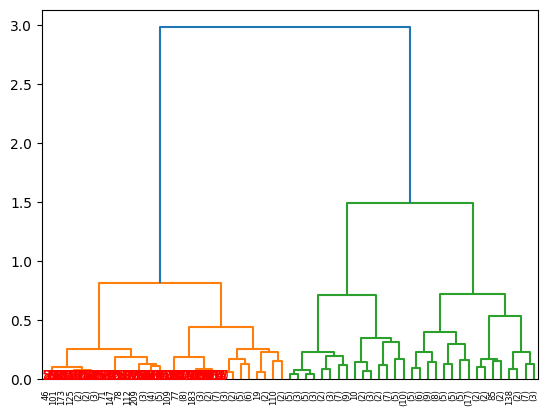

220

In [15]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 덴드로그램 생성
linkage_matrix = linkage(data, method='ward')  # ward linkage를 사용하여 linkage matrix 생성
dendrogram(linkage_matrix, truncate_mode='level', p=5)  # truncate_mode와 p를 통해 덴드로그램을 잘라내거나 축소할 수 있음

# 그래프에 클러스터 레이블 추가
for i, label in enumerate(cluster_labels2):
    plt.text(i, 0, str(label), color='r')

plt.show()

len(cluster_labels2)


In [16]:
df_heir = pd.concat([X,df_keyword3], axis=1, ignore_index=False)
df_heir['Y(계층적 군집 분류)'] = cluster_labels2+1
df_heir

,1,X1(keyword1),X2(keyword2),X3(keyword3),Y(계층적 군집 분류)
0,[채용] 본교 인재개발원 연구원 채용 공고,0.7976,0.7846,0.6537,6
1,[인재개발원/채용상담회] 한국경제인협회(구 전국경제인연합회) 채용상담회: 11.1....,0.7234,0.6864,0.6608,3
2,[채용] 산학협력단 직원 채용 공고,0.7352,0.6272,0.5600,9
3,[글로벌소통교육실] 겨울계절학기 영어 말하기프로그램 Speaking Master P...,0.5199,0.4851,0.4582,8
4,[언어교육원] 2023학년도 싱가포르 NTU 난양공대 위탁과정 언어교육원 한국어도우...,0.6966,0.6114,0.5476,2
...,...,...,...,...,...
215,[채용]이화여자대학교 산학협력단 직원(사업관리 및 정산) 채용 공고,0.7370,0.7176,0.6357,3
216,[조교모집] 23-2 건축학전공 A/B급 조교 모집,0.7515,0.6480,0.6328,3
217,[정책과학대학원] 2023학년도 2학기 B급 학생조교 모집 (마감),0.7438,0.7084,0.6847,6
218,[조교모집] 2023-2학기 수학과 B급 조교 모집,0.8285,0.7389,0.7291,1


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

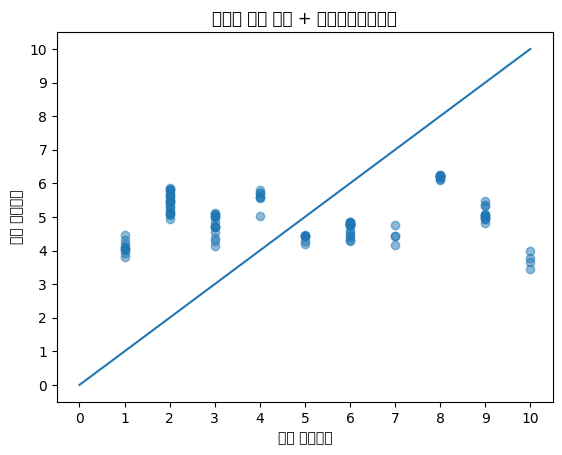

In [17]:
from sklearn.model_selection import train_test_split
# 데이터 분할
data_X = df_heir[['X1(keyword1)','X2(keyword2)','X2(keyword2)']]
val_Y = df_heir[['Y(계층적 군집 분류)']]
data_X_train, data_X_test, val_Y_train, val_Y_test = train_test_split(data_X, val_Y, train_size = 0.5, test_size = 0.5)

from sklearn.linear_model import LinearRegression
# 다중 선형회귀 모델 학습
mlr = LinearRegression()
mlr.fit(data_X_train, val_Y_train)
val_Y_predict = mlr.predict(data_X_test)

import matplotlib.pyplot as plt
# 그래프 플로팅
x = np.linspace(0, 10, 10)
y =  x
plt.scatter(val_Y_test, val_Y_predict, alpha = 0.5)
# 비교 직선 y=x 플로팅
plt.plot(x, y, label='y=x')

plt.xticks(np.arange(0, 11, 1))  # x축 눈금
plt.yticks(np.arange(0, 11, 1))  # y축 눈금
plt.xlabel('실제 분류번호')
plt.ylabel('예측 분류번호')
plt.title('계층적 군집 분류 + 다중선형회귀검증')
plt.legend
plt.show()

In [18]:
# 예측이 유효한 경우
# 실제와 예측이 유사한 경우
# 실제 분류번호와 예측 분류번호 차이가 0.5미만이 경우

count_diff_05 = np.sum(np.abs(val_Y_test - val_Y_predict) < 0.5)

correct_heir = int(count_diff_05)
print("유효한 예측 수: ",correct_heir)

train_heir = len(data_X_test)
print("전체 훈련 횟수: ",train_heir)

print("예측 적중 확률: {:.4f}%".format((correct_heir / train_heir) * 100))

유효한 예측 수:  0
전체 훈련 횟수:  110
예측 적중 확률: 0.0000%


# **[비지도 분류] T-SNE**

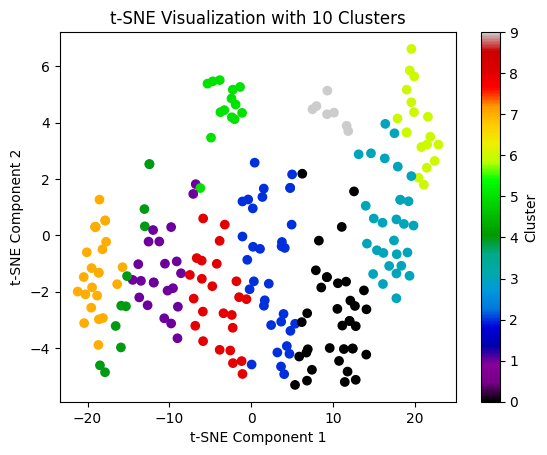

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

data = np.array(top3_list)

# KMeans 군집화를 사용하여 데이터를 10개의 클러스터로 나눔
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(data)

# t-SNE 모델 생성 및 학습
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(data)

# 결과 시각화 (각 클러스터를 다른 색으로 표시)
plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=clusters, cmap='nipy_spectral')
plt.title('t-SNE Visualization with 10 Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()
